## Plots for betweenness  vs universality for every enzyme

In [1]:
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import time 
import seaborn as sns


In [2]:
class Domain:

    def __init__(self,name):

        self.name = name
        
        self.path_degree = "../results/topology/degree/degree_list_dict_enz_%s.json"%(self.name)
        
        self.path_betweenness = "../results/topology/betweenness/betweenness_list_dict_enz_%s.json"%(self.name)

        cb = {'black':[0,0,0], 'orange':[230/255,159/255,0], 'skyblue':[86/255,180/255,233/255],
        'bluishgreen':[0,158/255,115/255], 'yellow':[240/255,228/255,66/255],'blue':[0,114/255,178/255],
        'vermillion':[213/255,94/255,0],'reddishpurple':[204/255,121/255,167/255], 'brown':[109, 22, 3]}

        #'brown': HEX #6D1603 RGB 109, 22, 3  HSL 11, 97%, 22%
        color = {'Metagenome': cb['bluishgreen'],
            'Bacteria': cb['blue'],
            'Archaea': cb['vermillion'],
            'Eukaryota': cb['orange'],
            'Pantaxa': cb['reddishpurple'],    
            'LUCA': cb['black'],
            'Biosphere': cb['skyblue']}

        self.color = color[self.name]
        

In [3]:
def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f) 
    return data


    
# def load_data(domain, kind):
#     """
# 
#     :type domain: object
#     """
#     if kind == "degree":
#         path = domain.path_degree
#     elif kind == "betweenness":
#         path = domain.path_betweenness
#     else:
#         sys.exit("kind should be either degree or betweenness")
# 
#     list_dict = load_json(path)
# 
#     df = pd.DataFrame()
#     for n in range(0, len(list_dict)):
#         new_data = pd.DataFrame.from_dict(list_dict[n], orient="index")  # Enzyme node becomes index
#         df = pd.concat([df, new_data])
# 
#     df.columns = [kind]  # Assign the name of the column for degree
#     df["enz"] = df.index  # Assign the name of the column for nodes aside from index
#     df["ec_class"] = df["enz"].str.split('.').str[0]  # EC class determined by the first digit will be added as a separate column
#     df = df.sort_values('enz')
#     return df

ec_class_name = {'1':'oxidoreductases',
     '2':'transferases',
    '3': 'hydrolases',
    '4': 'lyases',
    '5': 'isomerases',
    '6': 'ligases'}

def load_data(domain):
    
    list_dict_bet = load_json(domain.path_betweenness)
    list_dict_degree = load_json(domain.path_degree)

    bet = dict()
    degree = dict()
    for ec_index in range(1, len(ec_class_name) + 1):
        ec = str(ec_index)
        bet[ec] = list()
        degree[ec] = list()
        
    for n in range(0, len(list_dict_bet)):
        for m in list_dict_bet[n]:
            if m not in list_dict_degree[n]:
                continue   
            ec = m.split(".")[0]

            bet[ec].append(list_dict_bet[n][m])
            degree[ec].append(list_dict_degree[n][m])
            
    return degree, bet 


In [4]:
archaea = Domain('Archaea')
bacteria = Domain('Bacteria')
eukaryota = Domain('Eukaryota')
metagenome = Domain('Metagenome')
luca = Domain("LUCA")
biosphere = Domain("Biosphere")
pantaxa = Domain("Pantaxa")




list_domain = [luca, archaea, bacteria, eukaryota, pantaxa, metagenome, biosphere]

In [5]:
sns.set() # S
sns.set_context("paper")
sns.set_style(style='whitegrid')

In [6]:
# # test the list of enzymes from betweenness data is same as one from degree data 
# for domain in list_domain:
#     print(domain.name)
#     bs = time.time()
#     data_degree, data_bet = load_data(domain)
#     es = time.time()
#     print(es - bs)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


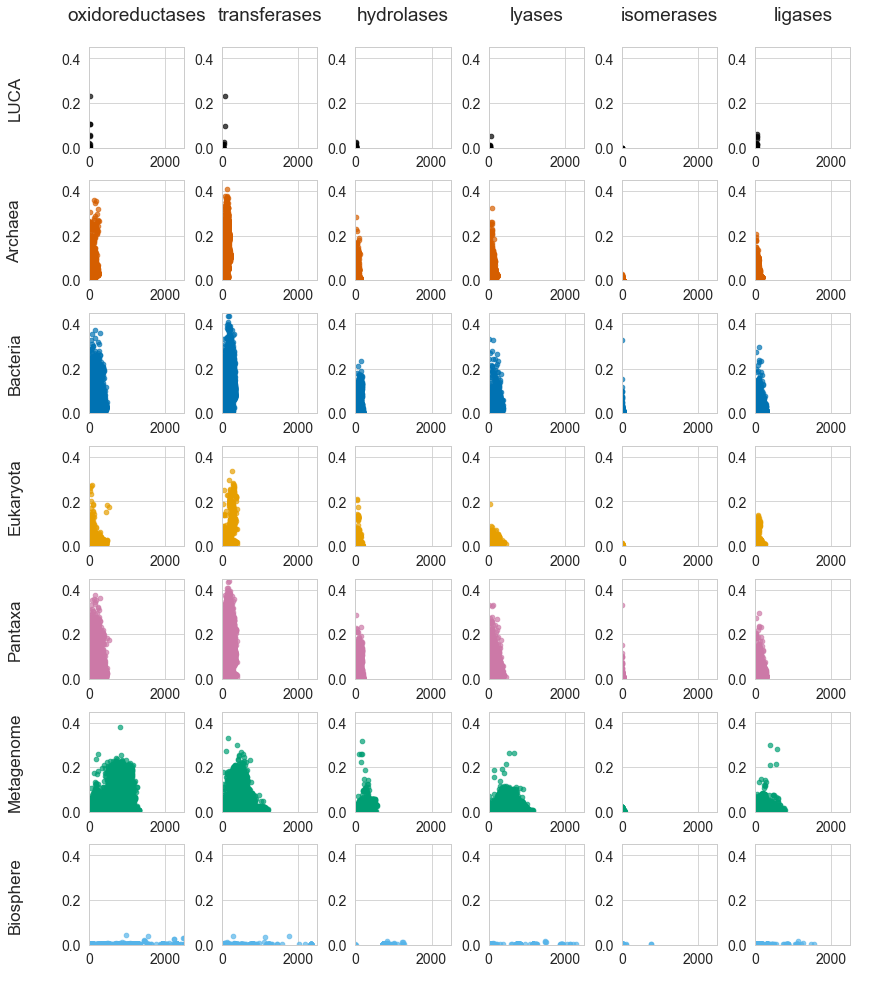

In [7]:
 
plt.figure(figsize=(2 * len(ec_class_name), 2 * len(list_domain))) #sharex=True, sharey=True)
j = 0
for domain in list_domain:
    i = 0
    data_degree, data_bet = load_data(domain)
    for ec_index in range(1, len(ec_class_name) + 1):
        plt.subplot(len(list_domain), len(ec_class_name), ec_index + j)
        print(ec_index + j)
        ec_class = str(ec_index) 

        x = data_degree[ec_class]
        y = data_bet[ec_class]

        plt.scatter(x, y, alpha=0.7, label=domain.name, color=domain.color)
        ax = plt.gca()
        ax.tick_params(labelsize=14)
        ax.set_xlim([0,2500])
        ax.set_ylim([0,0.45])
        # if domain == eukaryota and ec_index == 1:
        #     ax.set_ylabel("Betweenness", fontsize=25)
        # else:
        #     ax.set_ylabel("Betweenness", color="white", fontsize=25)
        
        i += 1
        if domain == luca:
            plt.title("%s\n"%ec_class_name[ec_class], fontsize= 19)
        if ec_index == 1:
            plt.ylabel("%s\n\n"%domain.name, fontsize= 17)
    j += i    

plt.xlabel("Betweenness", color="white", fontsize=25)
plt.tight_layout()
plt.savefig("../plots/betweenness_vs_degree_shareXY.png", dpi = 300)